## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Yaakov 6816
# student 2: Eitan 1342
# student 3: Mor 7137
# student 4: Moshe 5928
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mtl
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split,  GridSearchCV


# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# --------------------------------------

In [3]:
# loading datasets

wine_test = pd.read_csv("./wine_test.csv")
wine_train = pd.read_csv("./wine_train.csv")
wine_test.head()
wine_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [4]:
wine_train.describe(include='all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


<Figure size 800x800 with 0 Axes>

<Axes: >

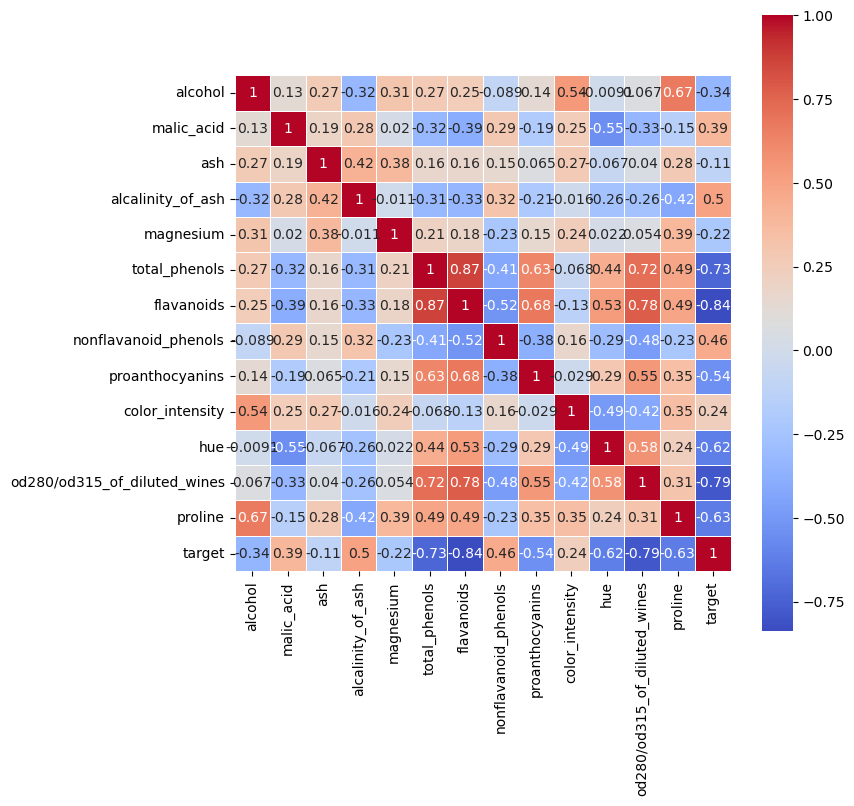

In [7]:
# correlation each feature with all 
# add heat map of corr
corr_matrix = wine_train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

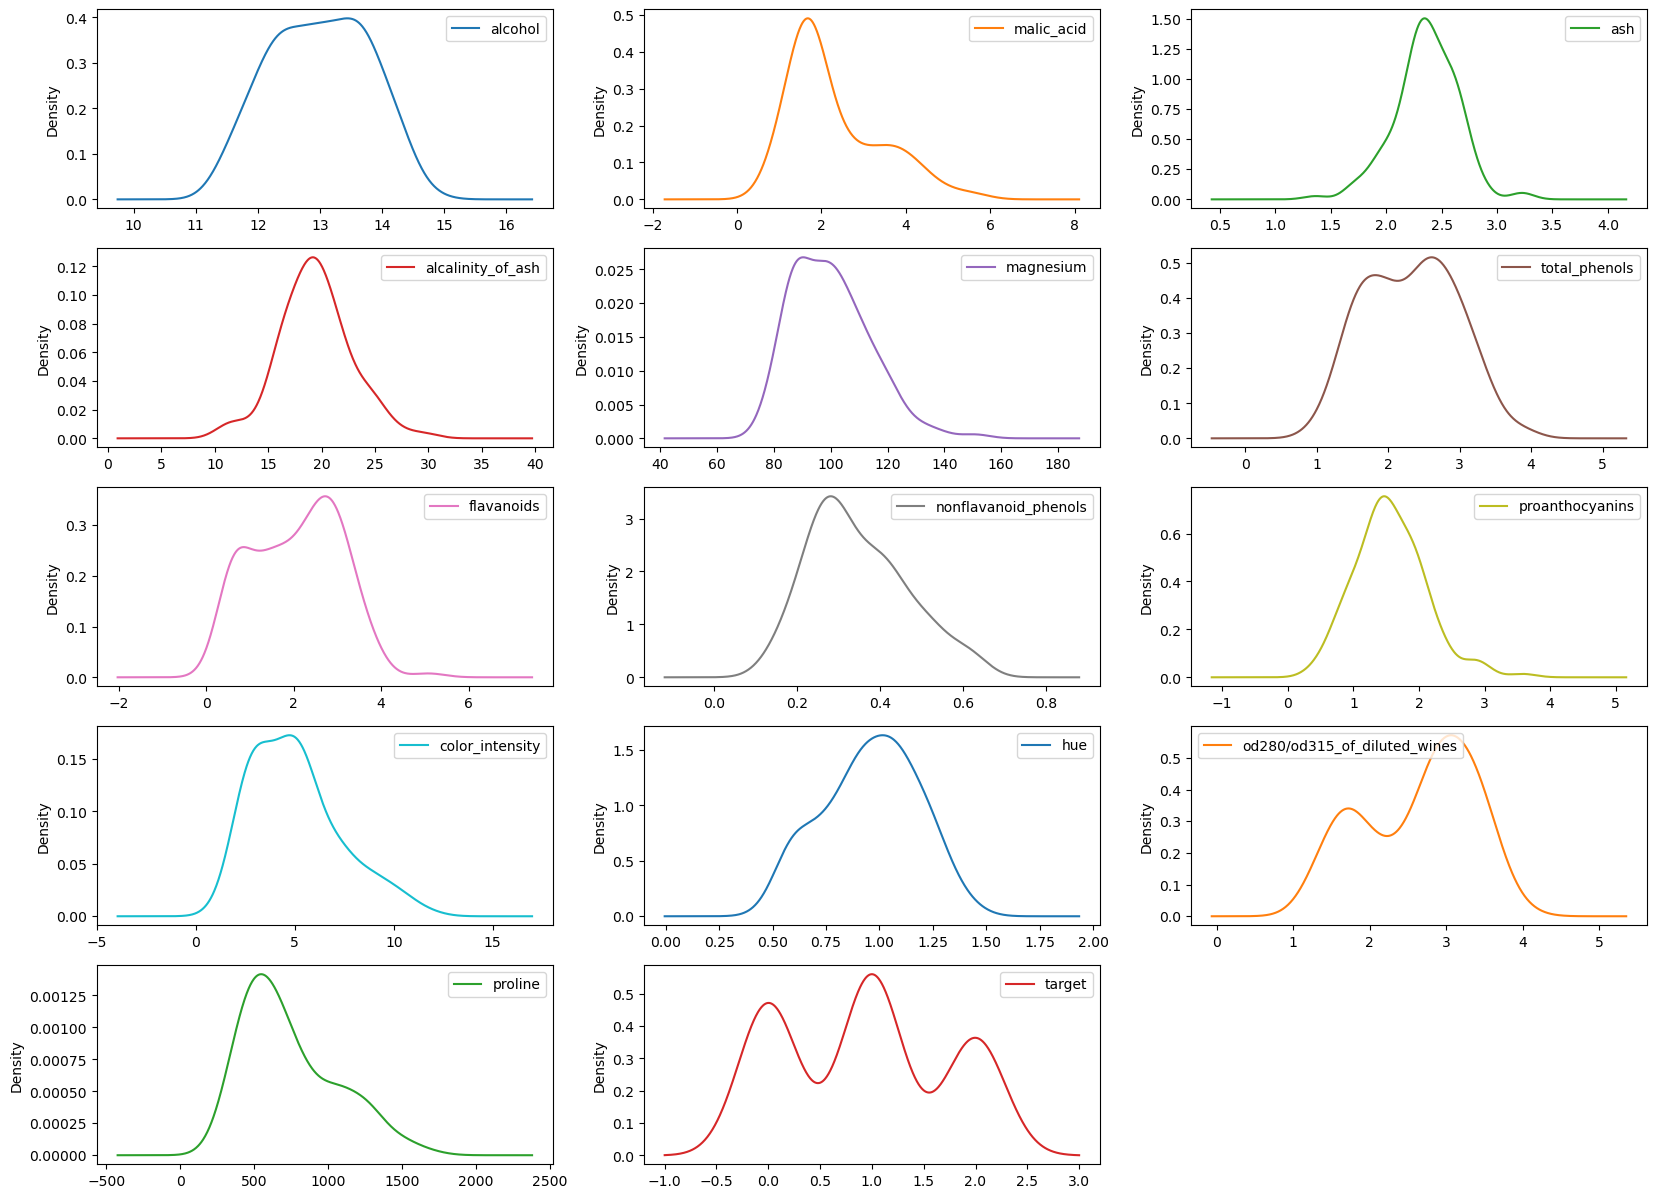

In [8]:
# Distribution of each feature

wine_train.plot(kind='density', subplots=True, layout=(5,3), sharex=False, figsize=(20,15))
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='target'>

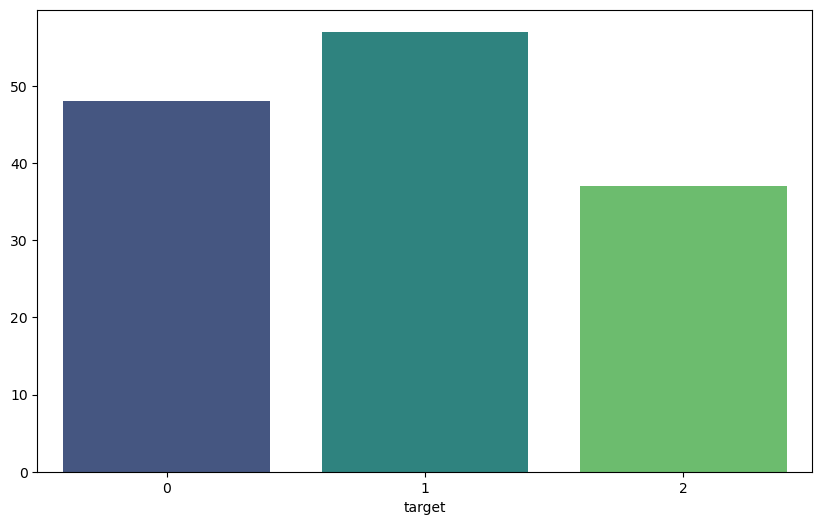

In [13]:
# correlation between total_phenols and flavanoids
#bar plot of how many of each category of wine
plt.figure(figsize=(10, 6))
target_count = wine_train['target'].value_counts()
sns.barplot(x=target_count.index, y=target_count.values, palette='viridis')
plt.show()

In [14]:
y_train = wine_train['target']
X_train = wine_train.drop(columns=['target'])
y_train
X_train

0      1
1      2
2      1
3      1
4      2
      ..
137    0
138    0
139    1
140    0
141    0
Name: target, Length: 142, dtype: int64

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
138,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
139,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
140,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


In [40]:
# scale the data
standard_scaler = StandardScaler()
standrad_scaled_data = standard_scaler.fit_transform(X_train)
standard_scaled_df = pd.DataFrame(standrad_scaled_data, columns=X_train.columns)

# select the columns for PCA
columns_for_pca = ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines']
standard_data_subset = standard_scaled_df[columns_for_pca]
# perform PCA
pca = PCA(n_components=1)  # Number of principal components
pca_result = pca.fit_transform(standard_data_subset)

# create a dataframe for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA'])

# combine the 2 dataframes 
standard_df = pd.concat([standard_scaled_df, pca_df], axis=1)
standard_df.drop(columns=columns_for_pca, axis=1, inplace=True)
standard_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,PCA
0,-1.165293,-0.429338,-0.147716,-0.275119,-1.389292,1.479415,0.144876,-1.178572,0.554869,-0.830216,-1.273141
1,0.740330,0.259077,1.163262,1.519686,0.370822,0.369703,-0.040628,1.626473,-0.998662,0.023858,-2.076275
2,-0.796872,-1.246256,-3.549173,-2.638279,-0.875925,-0.569283,-2.118278,-1.380213,0.417793,-0.703687,-1.829730
3,-1.495601,-0.530305,-1.706717,0.024015,-1.022601,0.198979,-0.263233,-1.330923,-0.084820,-1.035826,-0.238823
4,0.206756,1.167784,-0.750057,0.472716,0.150808,0.711153,-0.485839,-0.461628,-1.638351,0.276917,-2.387322
...,...,...,...,...,...,...,...,...,...,...,...
137,0.257572,-0.475232,-0.785489,-2.458798,0.004132,-0.740008,-0.522940,-0.291353,0.417793,0.972829,1.309793
138,1.515283,-0.649631,0.419194,-0.873387,0.590836,-0.227834,0.552986,1.644397,1.240251,2.965668,2.144177
139,-1.165293,-1.071858,0.525489,1.370119,-1.609306,0.455066,-0.300334,-1.268190,1.605788,-0.355731,-0.511398
140,1.527987,-0.493590,0.312898,-1.262262,0.884189,-0.057109,0.757041,0.770621,0.417793,2.238124,1.819704


In [43]:
# Initialize the scaler with the feature range set to (-1, 1)
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

# Fit the scaler to the DataFrame and transform the data
min_max_data_scaled = min_max_scaler.fit_transform(X_train)
min_max_df_scaled = pd.DataFrame(min_max_data_scaled, columns=X_train.columns)
min_max_data_subset = min_max_df_scaled[columns_for_pca]
# perform PCA
pca = PCA(n_components=1)  # Number of principal components
pca_result = pca.fit_transform(min_max_data_subset)

# create a dataframe for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA'])

# combine the 2 dataframes 
min_max_df = pd.concat([min_max_df_scaled, pca_df], axis=1)
min_max_df.drop(columns=columns_for_pca, axis=1, inplace=True)
min_max_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,PCA
0,-0.598802,-0.556008,0.026738,-0.185567,-0.917808,0.56,-0.227848,-0.786055,0.237113,-0.711840,0.569697
1,0.299401,-0.250509,0.422460,0.432990,-0.260274,0.04,-0.291139,0.409742,-0.463918,-0.326676,0.963634
2,-0.425150,-0.918534,-1.000000,-1.000000,-0.726027,-0.40,-1.000000,-0.872015,0.175258,-0.654779,0.855523
3,-0.754491,-0.600815,-0.443850,-0.082474,-0.780822,-0.04,-0.367089,-0.851003,-0.051546,-0.804565,0.123197
4,0.047904,0.152749,-0.155080,0.072165,-0.342466,0.20,-0.443038,-0.480420,-0.752577,-0.212553,1.105249
...,...,...,...,...,...,...,...,...,...,...,...
137,0.071856,-0.576375,-0.165775,-0.938144,-0.397260,-0.48,-0.455696,-0.407832,0.175258,0.101284,-0.647958
138,0.664671,-0.653768,0.197861,-0.391753,-0.178082,-0.24,-0.088608,0.417383,0.546392,1.000000,-0.870397
139,-0.598802,-0.841141,0.229947,0.381443,-1.000000,0.08,-0.379747,-0.824260,0.711340,-0.497860,0.186154
140,0.670659,-0.584521,0.165775,-0.525773,-0.068493,-0.16,-0.018987,0.044890,0.175258,0.671897,-0.752624


In [58]:
# Define the parameter grid
score_df = pd.DataFrame(columns=['Standard Scaler','Min Max Scaler'], index = ['knn','naive-bayes'])
param_grid = {
    'n_neighbors': [1,3,5,7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Define the scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring=f1_scorer)

# Fit GridSearchCV to the training data
grid_search.fit(standard_df, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)


# Retrieve the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Standard Scaling Score:", grid_search.best_score_)
score_df.loc['knn', 'Standard Scaler'] = grid_search.best_score_

# Evaluate the model on test data
best_standard_knn = grid_search.best_estimator_
results_df

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, average=macro))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Cross-Validation Standard Scaling Score: 0.9726281448020577


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002200,4.003069e-04,0.006201,4.005909e-04,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.928030,0.858637,1.0,0.966583,0.968254,0.944301,0.048530,11
1,0.001802,4.010532e-04,0.003800,3.997352e-04,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.928030,0.858637,1.0,0.966583,0.968254,0.944301,0.048530,11
2,0.002018,3.442929e-05,0.006001,3.015783e-07,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.963285,0.931602,1.0,0.966583,0.928571,0.958008,0.026186,5
3,0.001800,4.000426e-04,0.003401,4.901350e-04,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.963285,0.931602,1.0,0.966583,0.928571,0.958008,0.026186,5
4,0.001800,4.000427e-04,0.005878,4.635855e-04,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.963285,0.858637,1.0,0.963285,0.928571,0.942756,0.047743,15
5,0.002000,5.309834e-07,0.003601,4.900183e-04,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.963285,0.858637,1.0,0.963285,0.928571,0.942756,0.047743,15
6,0.001800,3.998283e-04,0.005602,4.898432e-04,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.963285,0.858637,1.0,0.963285,0.961905,0.949422,0.047624,9
7,0.002023,4.542134e-05,0.003600,4.894957e-04,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.963285,0.858637,1.0,0.963285,0.961905,0.949422,0.047624,9
8,0.002000,1.168008e-07,0.006001,4.909339e-07,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.963285,0.928030,1.0,0.899749,0.928571,0.943927,0.034523,13
9,0.002000,1.485101e-06,0.003401,4.905638e-04,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.963285,0.928030,1.0,0.899749,0.928571,0.943927,0.034523,13


In [59]:
grid_search.fit(min_max_df, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)


# Retrieve the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Min Max Scaling Score:", grid_search.best_score_)
score_df.loc['knn', 'Min Max Scaler'] = grid_search.best_score_
# Evaluate the model on test data
best_min_max_knn = grid_search.best_estimator_
results_df

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, average=macro))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Min Max Scaling Score: 0.9726190476190476


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002001,2.431402e-07,0.005839,4.257697e-04,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.928030,0.858637,0.963285,0.966583,0.968254,0.936958,0.041867,13
1,0.002000,2.431402e-07,0.003601,4.899408e-04,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.928030,0.858637,0.963285,0.966583,0.968254,0.936958,0.041867,13
2,0.002000,7.478899e-07,0.006401,4.898826e-04,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.963285,0.858637,0.966583,0.966583,0.928571,0.936732,0.041600,15
3,0.001801,4.003289e-04,0.003627,4.597380e-04,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.963285,0.858637,0.966583,0.966583,0.928571,0.936732,0.041600,15
4,0.002000,3.873843e-07,0.005001,2.611745e-07,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.963285,0.894841,1.000000,0.963285,0.961905,0.956663,0.034103,9
5,0.001801,4.001384e-04,0.003400,4.900572e-04,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.963285,0.894841,1.000000,0.963285,0.961905,0.956663,0.034103,9
6,0.001800,4.004482e-04,0.006028,5.331253e-05,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.963285,0.894841,1.000000,1.000000,0.961905,0.964006,0.038418,5
7,0.001800,4.001618e-04,0.003601,4.900379e-04,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.963285,0.894841,1.000000,1.000000,0.961905,0.964006,0.038418,5
8,0.002201,4.001380e-04,0.006001,6.325960e-07,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.963285,0.894841,1.000000,0.933333,0.928571,0.944006,0.035430,11
9,0.001999,1.196852e-06,0.003601,4.905049e-04,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.963285,0.894841,1.000000,0.933333,0.928571,0.944006,0.035430,11


In [67]:
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(-9, -1, 10)
}

# Initialize the GNB model
gnb = GaussianNB()

# Define the scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring=f1_scorer)

# Fit GridSearchCV to the training data
grid_search.fit(standard_df, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

# Retrieve the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
score_df.loc['naive-bayes', 'Standard Scaler'] = grid_search.best_score_
# Evaluate the model on test data
best_standard_gnb = grid_search.best_estimator_
results_df

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-09, 7.74263683e-09, 5.99484250e-08, 4.64158883e-07,
       3.59381366e-06, 2.78255940e-05, 2.15443469e-04, 1.66810054e-03,
       1.29154967e-02, 1.00000000e-01])},
             scoring=make_scorer(f1_score, average=macro))

Best Parameters: {'var_smoothing': 0.1}
Best Cross-Validation Score: 0.9864912280701755


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002400,4.900577e-04,0.003401,4.899408e-04,0.0,{'var_smoothing': 1e-09},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
1,0.002202,3.995721e-04,0.002999,2.249742e-06,0.0,{'var_smoothing': 7.742636826811278e-09},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
2,0.002102,2.038480e-04,0.003202,3.990684e-04,0.0,{'var_smoothing': 5.99484250318941e-08},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
3,0.002602,4.910896e-04,0.003200,4.003064e-04,0.0,{'var_smoothing': 4.6415888336127725e-07},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
4,0.002201,4.009734e-04,0.003201,3.997386e-04,0.000004,{'var_smoothing': 3.5938136638046257e-06},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
5,0.002000,3.371748e-07,0.003001,3.504023e-07,0.000028,{'var_smoothing': 2.782559402207126e-05},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
6,0.002399,4.916437e-04,0.003204,3.991531e-04,0.000215,{'var_smoothing': 0.00021544346900318823},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
7,0.002400,4.906022e-04,0.003001,6.143617e-07,0.001668,{'var_smoothing': 0.0016681005372000558},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
8,0.002000,2.075201e-06,0.003001,9.818678e-07,0.012915,{'var_smoothing': 0.012915496650148827},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,2
9,0.002401,4.903107e-04,0.003000,8.064048e-07,0.1,{'var_smoothing': 0.1},1.0,0.932456,1.0,1.0,1.0,0.986491,0.027018,1


In [63]:
# Fit GridSearchCV to the training data
grid_search.fit(min_max_df, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

# Retrieve the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
score_df.loc['naive-bayes', 'Min Max Scaler'] = grid_search.best_score_

# Evaluate the model on test data
best_min_max_gnb = grid_search.best_estimator_
results_df

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-09, 7.74263683e-09, 5.99484250e-08, 4.64158883e-07,
       3.59381366e-06, 2.78255940e-05, 2.15443469e-04, 1.66810054e-03,
       1.29154967e-02, 1.00000000e-01])},
             scoring=make_scorer(f1_score, average=macro))

Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validation Score: 0.9801481481481481


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002600,4.896094e-04,0.003401,8.006097e-04,0.0,{'var_smoothing': 1e-09},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
1,0.002000,1.507891e-07,0.003201,4.016400e-04,0.0,{'var_smoothing': 7.742636826811278e-09},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
2,0.002201,4.002334e-04,0.003001,4.768372e-07,0.0,{'var_smoothing': 5.99484250318941e-08},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
3,0.002201,3.999239e-04,0.003201,4.002335e-04,0.0,{'var_smoothing': 4.6415888336127725e-07},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
4,0.002200,4.002338e-04,0.003001,5.761645e-07,0.000004,{'var_smoothing': 3.5938136638046257e-06},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
5,0.002201,3.998519e-04,0.003401,4.898625e-04,0.000028,{'var_smoothing': 2.782559402207126e-05},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
6,0.002000,8.476443e-07,0.003001,4.101908e-07,0.000215,{'var_smoothing': 0.00021544346900318823},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
7,0.002000,2.132481e-07,0.003147,2.925397e-04,0.001668,{'var_smoothing': 0.0016681005372000558},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
8,0.002001,3.015783e-07,0.003006,9.741493e-06,0.012915,{'var_smoothing': 0.012915496650148827},1.0,0.900741,1.0,1.0,1.0,0.980148,0.039704,1
9,0.002206,3.975491e-04,0.002999,2.728409e-06,0.1,{'var_smoothing': 0.1},1.0,0.865741,1.0,1.0,1.0,0.973148,0.053704,10


In [66]:
print("the score for each algorithm with diffrenet scaling:")
score_df

the score for each algorithm with diffrenet scaling:


,Standard Scaler,Min Max Scaler
knn,0.972628,0.972619
naive-bayes,0.986491,0.980148


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [68]:
best_standard_gnb.fit(combined_df, y_train)

GaussianNB(var_smoothing=0.1)

## Part 4 - Apply on test and show model performance estimation

In [69]:
y_test = wine_train['target']
X_test = wine_train.drop(columns=['target'])
y_test
X_test

0      1
1      2
2      1
3      1
4      2
      ..
137    0
138    0
139    1
140    0
141    0
Name: target, Length: 142, dtype: int64

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
138,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
139,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
140,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


In [76]:
# scale the data
scaled_data_test = standard_scaler.fit_transform(X_test)
scaled_df_test = pd.DataFrame(scaled_data_test, columns=X_test.columns)

# select the columns for PCA

data_subset_test = scaled_df_test[columns_for_pca]

# perform PCA

pca_result_test = pca.fit_transform(data_subset_test)

# create a dataframe for the PCA results
pca_df_test = pd.DataFrame(data=pca_result_test, columns=['PCA'])

# combine the 2 dataframes
combined_df_test = pd.concat([scaled_df_test, pca_df_test], axis=1)
combined_df_test.drop(columns=columns_for_pca, axis=1,inplace=True)
combined_df_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,PCA
0,-1.165293,-0.429338,-0.147716,-0.275119,-1.389292,1.479415,0.144876,-1.178572,0.554869,-0.830216,-1.273141
1,0.740330,0.259077,1.163262,1.519686,0.370822,0.369703,-0.040628,1.626473,-0.998662,0.023858,-2.076275
2,-0.796872,-1.246256,-3.549173,-2.638279,-0.875925,-0.569283,-2.118278,-1.380213,0.417793,-0.703687,-1.829730
3,-1.495601,-0.530305,-1.706717,0.024015,-1.022601,0.198979,-0.263233,-1.330923,-0.084820,-1.035826,-0.238823
4,0.206756,1.167784,-0.750057,0.472716,0.150808,0.711153,-0.485839,-0.461628,-1.638351,0.276917,-2.387322
...,...,...,...,...,...,...,...,...,...,...,...
137,0.257572,-0.475232,-0.785489,-2.458798,0.004132,-0.740008,-0.522940,-0.291353,0.417793,0.972829,1.309793
138,1.515283,-0.649631,0.419194,-0.873387,0.590836,-0.227834,0.552986,1.644397,1.240251,2.965668,2.144177
139,-1.165293,-1.071858,0.525489,1.370119,-1.609306,0.455066,-0.300334,-1.268190,1.605788,-0.355731,-0.511398
140,1.527987,-0.493590,0.312898,-1.262262,0.884189,-0.057109,0.757041,0.770621,0.417793,2.238124,1.819704


In [77]:
# Make predictions on the test data
y_pred = best_gnb.predict(combined_df_test)
y_pred

array([1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 2, 2, 0, 0, 1, 0, 0], dtype=int64)

In [78]:
print(list(y_test))

[1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0]


In [79]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro):", f1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9859154929577465
F1 Score (Macro): 0.9861988304093566
Confusion Matrix:
[[47  1  0]
 [ 0 56  1]
 [ 0  0 37]]
